In [20]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
#(i)
#(j)
import sklearn
testdata=np.loadtxt("digits_test_data.csv",delimiter=",")
testlabel=np.loadtxt("digits_test_labels.csv",delimiter=",")
for i in range(testlabel.size):
    if testlabel[i]==4:
        testlabel[i]=1
    else:
        testlabel[i]=-1
#import data
traindata=np.loadtxt("digits_training_data.csv",delimiter=",")
trainlabel=np.loadtxt("digits_training_labels.csv",delimiter=",")
for i in range(trainlabel.size):
    if trainlabel[i]==4:
        trainlabel[i]=1
    else:
        trainlabel[i]=-1
#get pi 
pi1=(trainlabel==1).sum()
pi2=1000-pi1
pi11=np.float(pi1)/np.float(trainlabel.size)
pi22=1-pi11
mu1=np.zeros((traindata[1,:].size,1))
mu2=np.zeros((traindata[1,:].size,1))
sigma1=np.zeros((traindata[:,1].size,traindata[1,:].size))
for i in range(traindata[1,:].size):
    for j in range(trainlabel.size):
        if trainlabel[j]==1:
            mu1[i,0]=mu1[i,0]+(traindata[j,i])
        else:
            mu2[i,0]=mu2[i,0]+(traindata[j,i])
    mu1[i,0]=mu1[i,0]/pi1
    mu2[i,0]=mu2[i,0]/pi2
for j in range(trainlabel.size):
    if trainlabel[j]==1:
        sigma1[j:j+1,:]=traindata[j:j+1,:]-mu1.T 
    else:
        sigma1[j:j+1,:]=traindata[j:j+1,:]-mu2.T 
sigma=np.dot(sigma1.T,sigma1)/trainlabel.size
#gamma1=((-1/2)*np.dot(np.dot(mu1.T,np.linalg.pinv(sigma)),mu1))+np.log(pi11)
#gamma2=((-1/2)*np.dot(np.dot(mu2.T,np.linalg.pinv(sigma)),mu2))+np.log(pi22)
gamma1 = -0.5*mu1.T.dot(np.linalg.pinv(sigma)).dot(mu1)+np.log(pi11)
gamma2 = -0.5*mu2.T.dot(np.linalg.pinv(sigma)).dot(mu2)+np.log(pi22)
beta1=np.linalg.pinv(sigma).dot(mu1)
beta2=np.linalg.pinv(sigma).dot(mu2)
y=np.zeros(trainlabel.size)
ytest=np.zeros(testlabel.size)
yita1=np.zeros(trainlabel.size)
yita2=np.zeros(trainlabel.size)
yitat1=np.zeros(testlabel.size)
yitat2=np.zeros(testlabel.size)
for i in range(trainlabel.size):
    yita1[i]=np.exp(np.dot(beta1.T,traindata[i,:])+gamma1)
    yita2[i]=np.exp(np.dot(beta2.T,traindata[i,:])+gamma2)
for i in range(testlabel.size):
    yitat1[i]=np.exp(np.dot(beta1.T,testdata[i,:])+gamma1)
    yitat2[i]=np.exp(np.dot(beta2.T,testdata[i,:])+gamma2)
a=0
b=0
for i in range(trainlabel.size):
    p1=np.float(yita1[i])/np.float(yita1[i]+yita2[i])
    p2=np.float(yita2[i])/np.float(yita1[i]+yita2[i])
    if p1>p2:
        y[i]=1
        if y[i]==trainlabel[i]:
            a=a+1
        else:
            a=a
    else:
        y[i]=-1
        if y[i]==trainlabel[i]:
            a=a+1
        else:
            a=a
#test data 
for i in range(testlabel.size):
    p1=yitat1[i]/np.float(yitat1[i]+yitat2[i])
    p2=yitat2[i]/np.float(yitat1[i]+yitat2[i])
    if p1>p2:
        ytest[i]=1
        if ytest[i]==testlabel[i]:
            b=b+1
        else:
            b=b
    else:
        ytest[i]=-1
        if ytest[i]==testlabel[i]:
            b=b+1
        else:
            b=b
accuratey=np.float(a)/np.float(trainlabel.size)
accurateyt=np.float(b)/np.float(testlabel.size)
print accuratey
print accurateyt
diff=np.abs(testlabel-ytest)
data = np.genfromtxt("digits_test_data.csv", delimiter=',')
N=np.zeros(53)
i=0
for k in range(0,500):
    if diff[k]!=0:
        N[i]=k
        i=i+1
    else:
        i=i
#plt.imshow(data[N[i]].reshape((26,26)), interpolation="nearest", cmap=cm.Greys_r)
print N

0.997
0.894
[   2.    4.   21.   22.   25.   34.   43.   50.   56.   72.   89.   90.
   94.  101.  110.  122.  125.  139.  163.  175.  198.  204.  209.  215.
  216.  220.  247.  253.  255.  273.  275.  288.  291.  296.  303.  325.
  329.  330.  336.  350.  365.  376.  390.  392.  396.  411.  414.  419.
  439.  458.  459.  468.  472.]


C:\Users\dingd\Anaconda2\lib\site-packages\ipykernel\__main__.py:61: RuntimeWarning: overflow encountered in exp
C:\Users\dingd\Anaconda2\lib\site-packages\ipykernel\__main__.py:62: RuntimeWarning: overflow encountered in exp
C:\Users\dingd\Anaconda2\lib\site-packages\ipykernel\__main__.py:82: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\dingd\Anaconda2\lib\site-packages\ipykernel\__main__.py:83: RuntimeWarning: invalid value encountered in double_scalars


C:\Users\dingd\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


(1.0, -1.0)

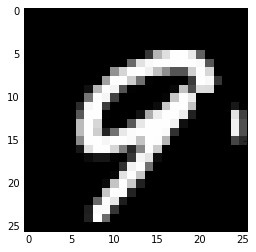

In [34]:
plt.imshow(data[N[2]].reshape((26,26)), interpolation="nearest", cmap=cm.Greys_r)
plt.savefig('wrong11')
ytest[21],testlabel[21]

C:\Users\dingd\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


(-1.0, 1.0)

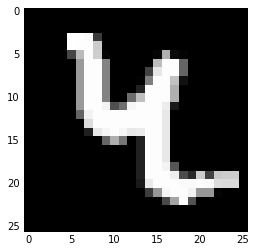

In [35]:
plt.imshow(data[N[5]].reshape((26,26)), interpolation="nearest", cmap=cm.Greys_r)
plt.savefig('wrong12')
ytest[34],testlabel[34]

C:\Users\dingd\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


(-1.0, 1.0)

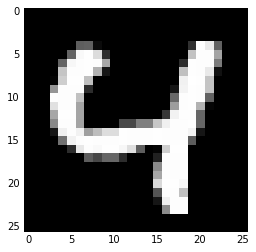

In [36]:
plt.imshow(data[N[6]].reshape((26,26)), interpolation="nearest", cmap=cm.Greys_r)
plt.savefig('wrong13')
ytest[43],testlabel[43]

C:\Users\dingd\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


(-1.0, 1.0)

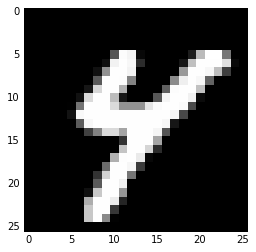

In [37]:
plt.imshow(data[N[7]].reshape((26,26)), interpolation="nearest", cmap=cm.Greys_r)
plt.savefig('wrong14')
ytest[50],testlabel[50]

C:\Users\dingd\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


(-1.0, 1.0)

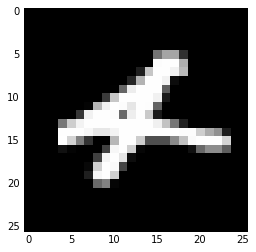

In [38]:
plt.imshow(data[N[10]].reshape((26,26)), interpolation="nearest", cmap=cm.Greys_r)
plt.savefig('wrong15')
ytest[89],testlabel[89]